In [116]:
f = open("fvtt-log-Tue-Feb-01-2022 (3).txt",encoding="utf8")
data = f.read()
data_list = data.split("---------------------------")
clean = []
characters = []
try:
    for i, item in enumerate(data_list):
        temp_list = item.split("\n")
        temp_list = list(filter(None, temp_list))
        roll_result = temp_list[1]
        try:
            found_action = temp_list[2].find("<strong>")
        except:
            found_action = -1
        if roll_result.isnumeric() and found_action>-1:
            character = temp_list[0][temp_list[0].index("]")+2:]
            if character not in characters:
                characters.append(character)
            action = temp_list[2][temp_list[2].index("<strong>")+8:temp_list[2].index("</strong>")]
            d20roll = temp_list[-1][temp_list[-1].index("=")+1:temp_list[-1].index("=")+4].strip()
            clean.append([character,roll_result,action,d20roll])
        data_list[i] = temp_list
except:
    print("error in line " + str)


In [109]:
clean

[['Mr. Biscuit Oliva', '22', 'Initiative: Perception', '10'],
 ['Ylem', '18', 'Skill Check: Arcana', '10'],
 ['Lucius', '31', 'Skill Check: Medicine', '17'],
 ['Ylem', '15', 'Skill Check: Arcana', '7'],
 ['Ylem', '28', 'Skill Check: Arcana', '20'],
 ['Ylem', '26', 'Skill Check: Thievery', '12'],
 ['Razonixx', '29', 'Skill Check: Medicine', '17'],
 ['Ylem', '19', 'Perception Check', '7'],
 ['Ylem', '27', 'Perception Check', '15'],
 ['Ylem', '24', 'Skill Check: Stealth', '9'],
 ['Ylem', '31', 'Perception Check', '19'],
 ['Lucius', '30', 'Perception Check', '16'],
 ['Ylem', '33', 'Skill Check: Stealth', '18'],
 ['Trujh Spellshot', '32', 'Skill Check: Stealth', '19'],
 ['Trujh Spellshot', '8', 'Skill Check: Religion', '1'],
 ['Lucius', '31', 'Skill Check: Religion', '17'],
 ['Mr. Biscuit Oliva', '17', 'Skill Check: Religion', '15'],
 ['Razonixx', '16', 'Initiative: Perception', '4'],
 ['Lucius', '34', 'Initiative: Perception', '20'],
 ['Razonixx', '17', 'Initiative: Perception', '5'],
 ['G

In [81]:
import matplotlib.pyplot as plt
import statistics

C:\Users\JuanPis\AppData\Local\Temp\ipykernel_11516\4102026360.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 1, figsize=(9, 3), sharey=True)


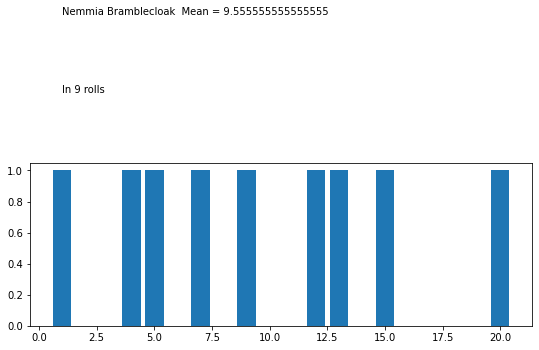

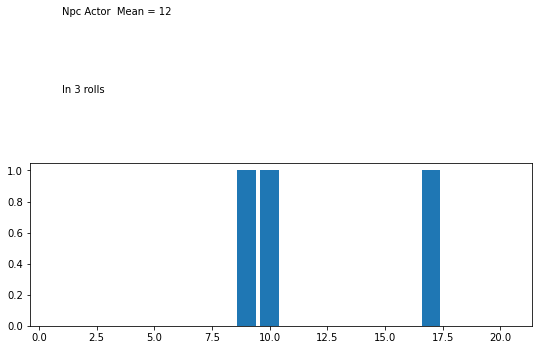

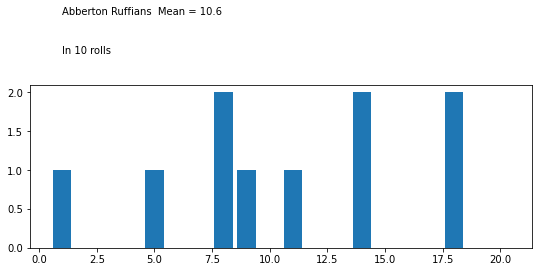

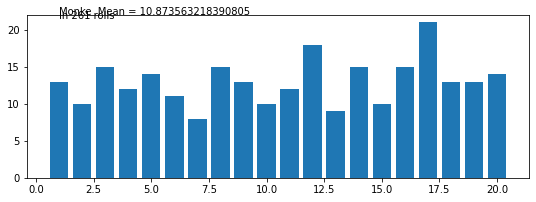

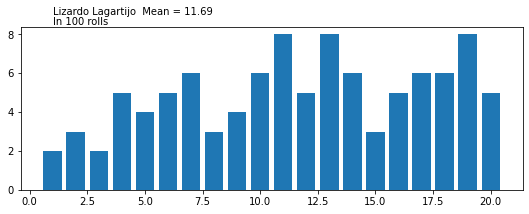

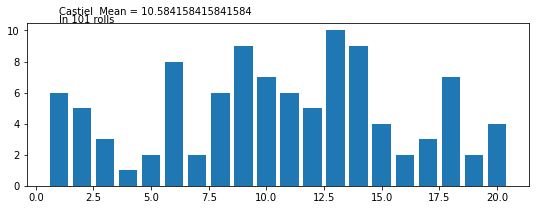

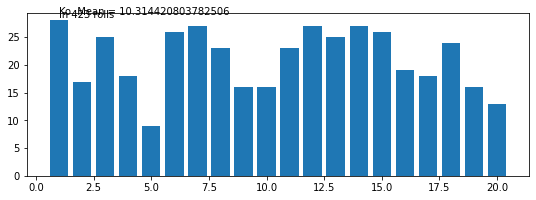

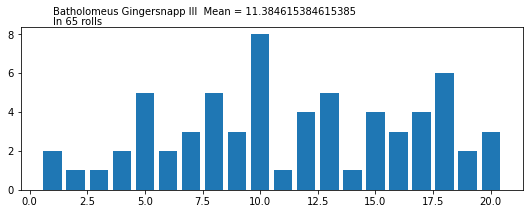

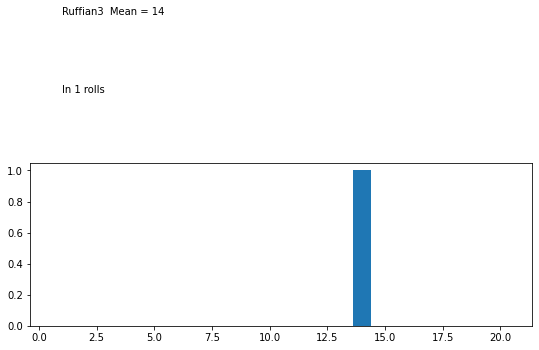

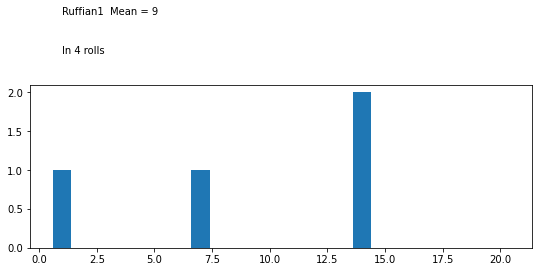

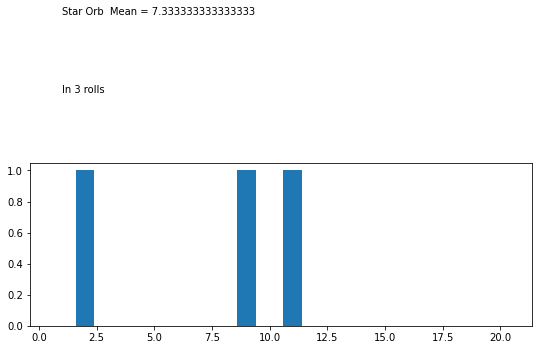

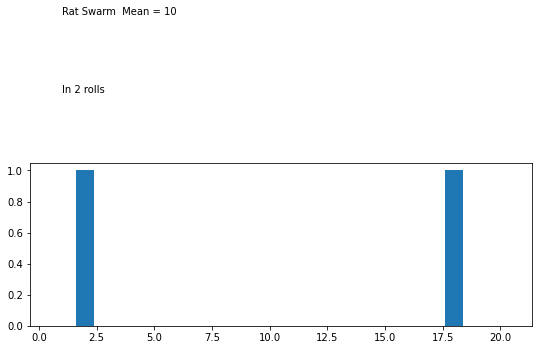

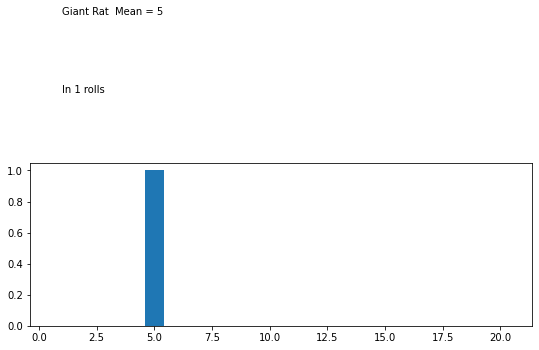

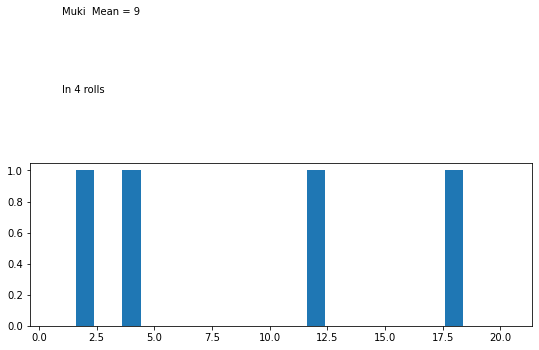

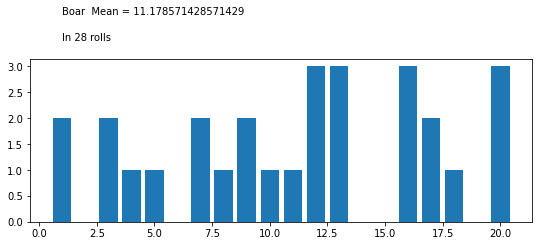

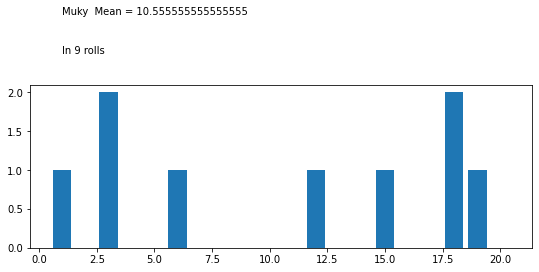

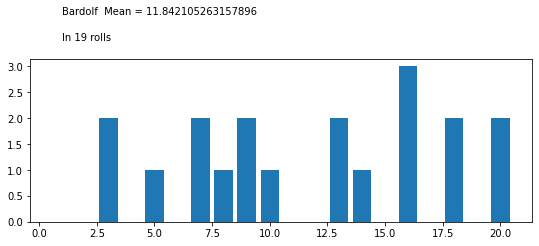

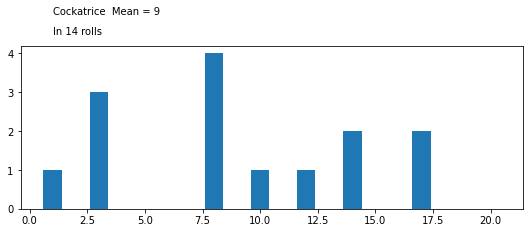

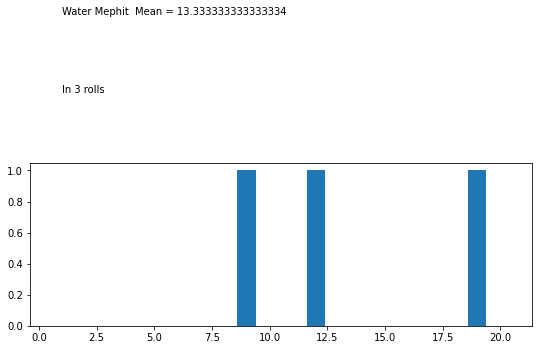

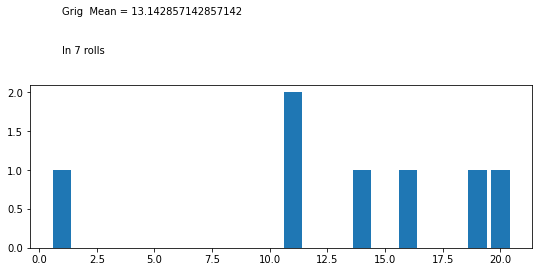

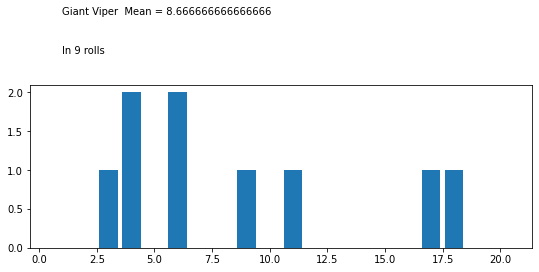

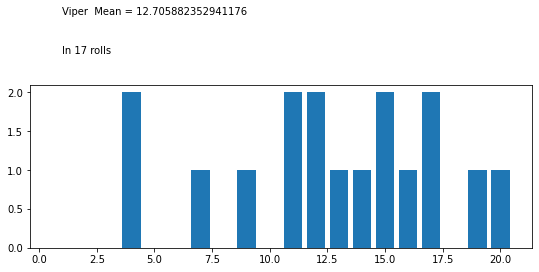

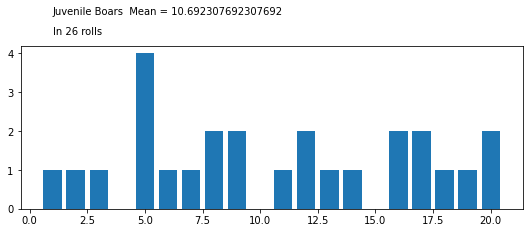

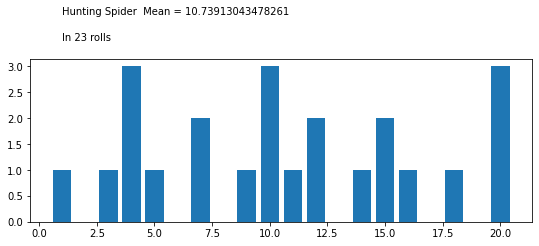

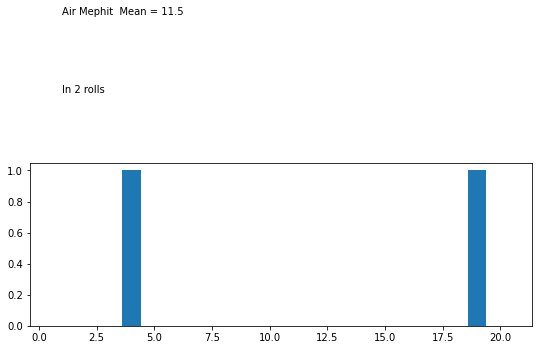

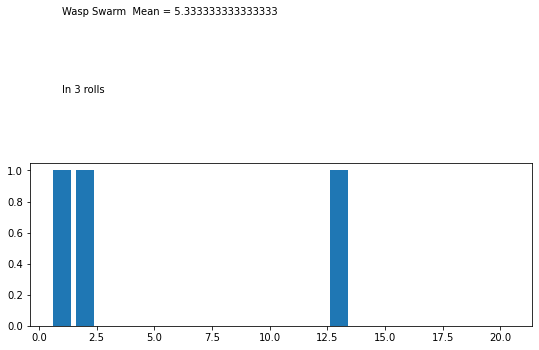

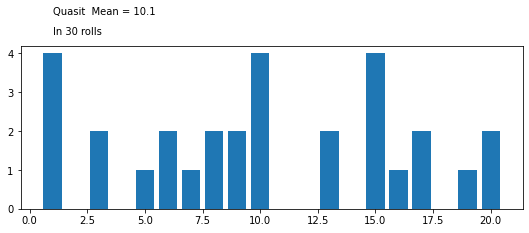

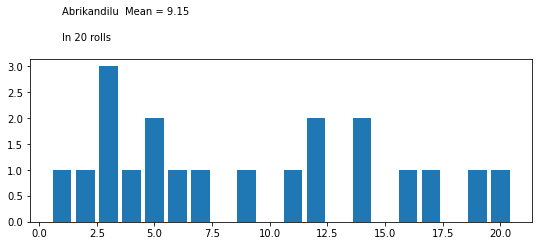

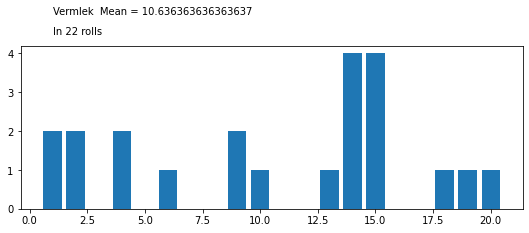

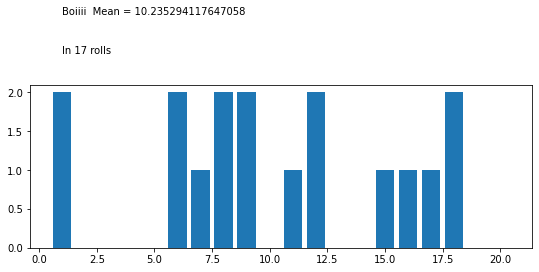

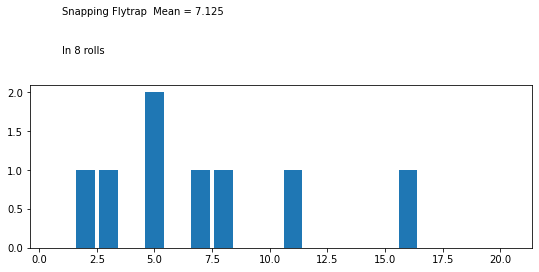

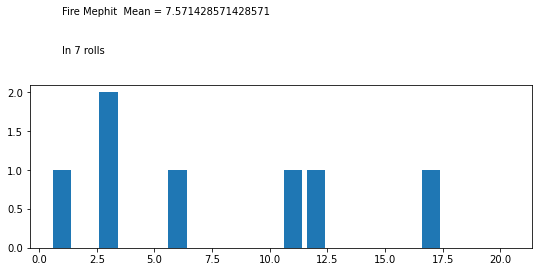

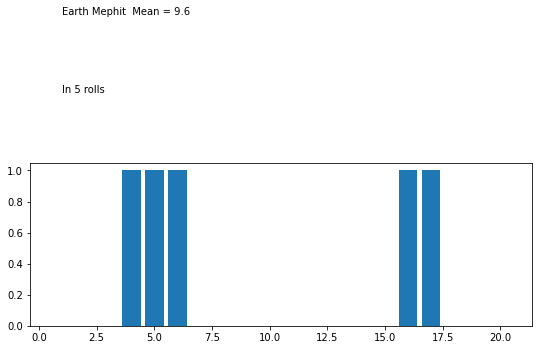

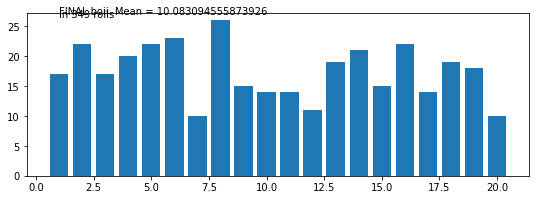

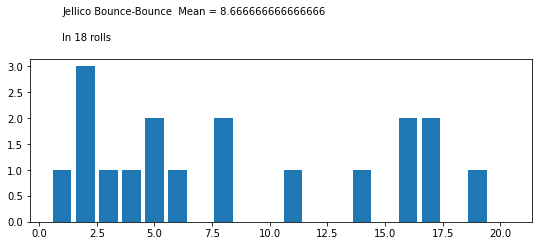

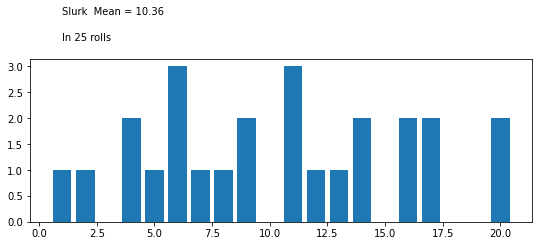

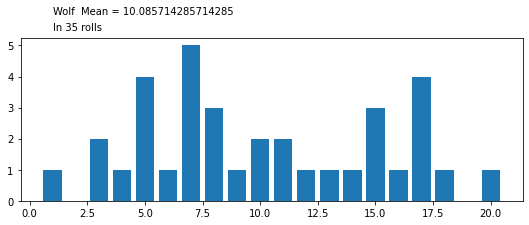

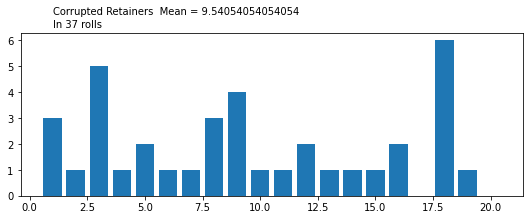

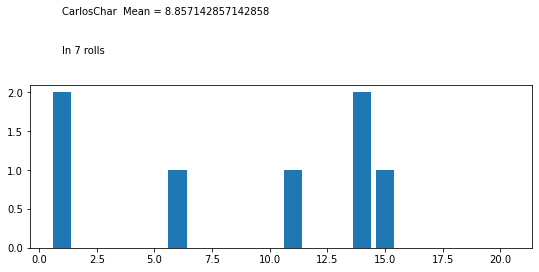

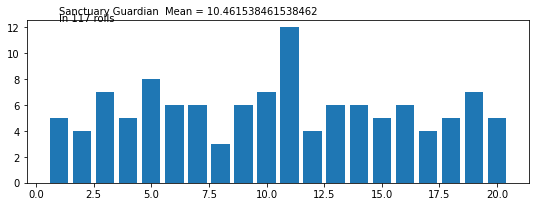

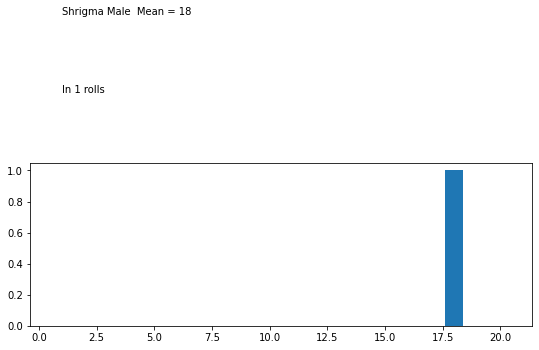

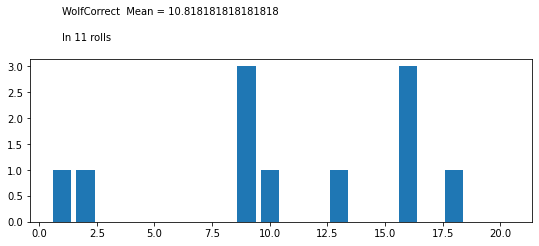

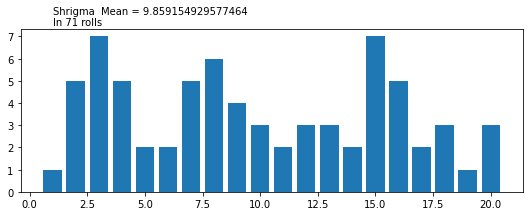

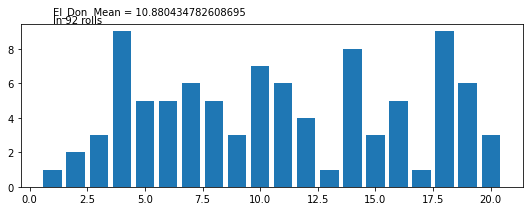

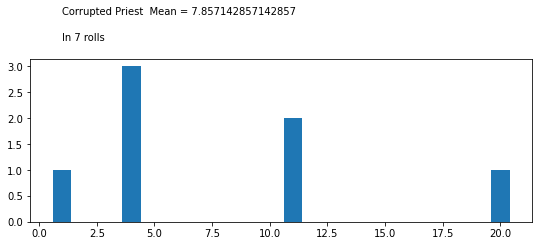

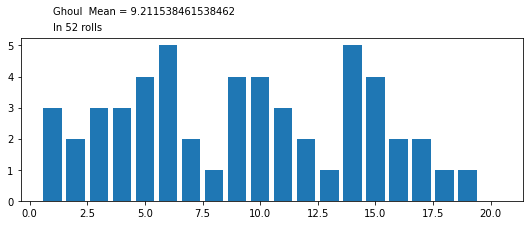

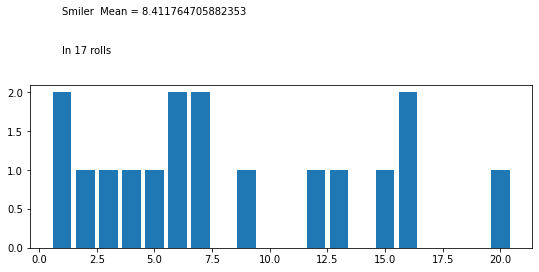

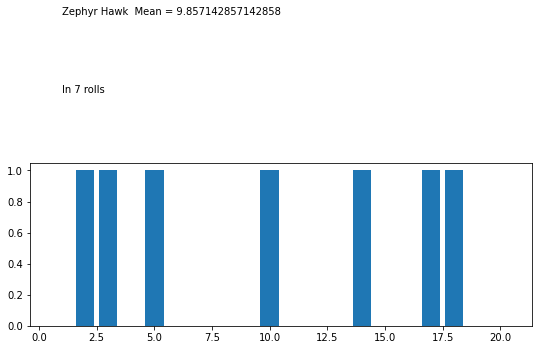

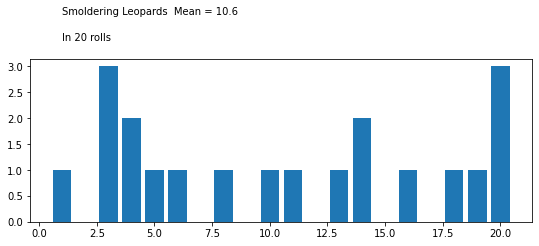

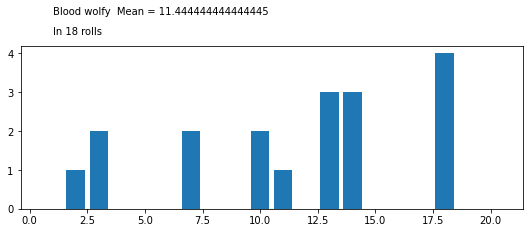

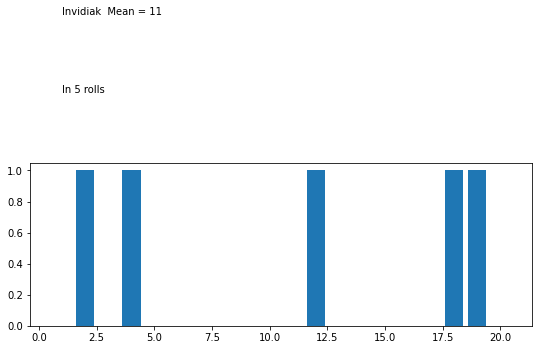

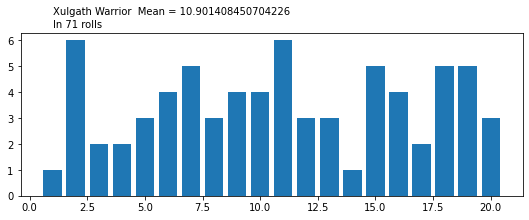

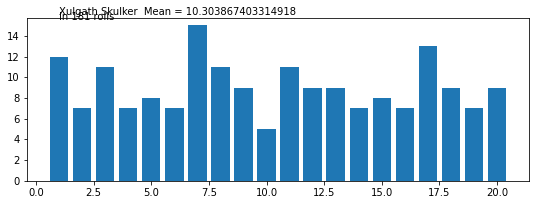

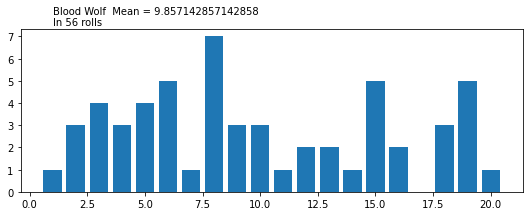

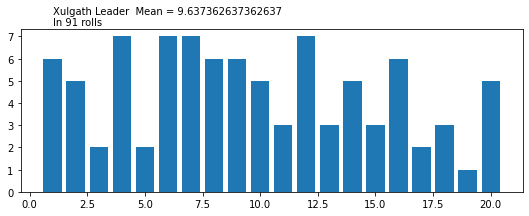

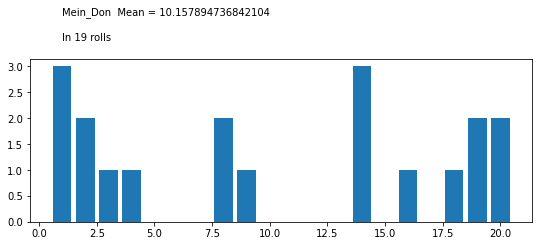

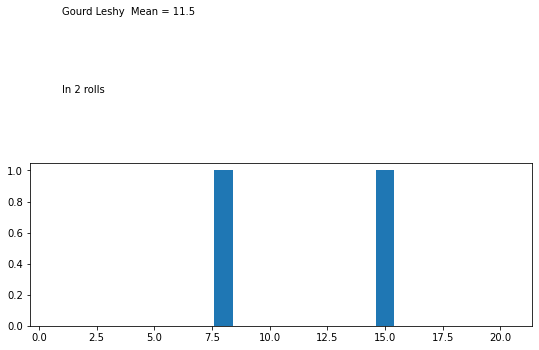

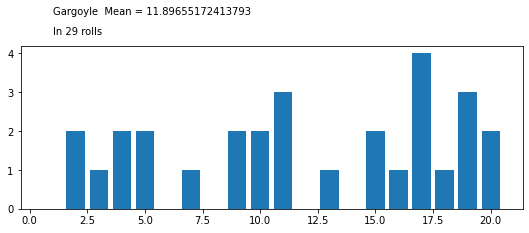

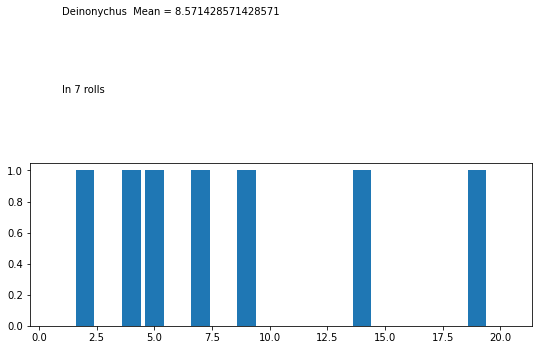

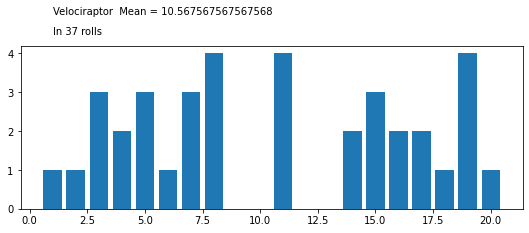

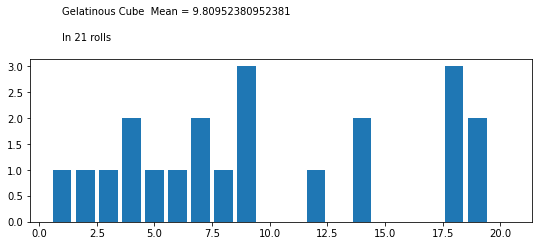

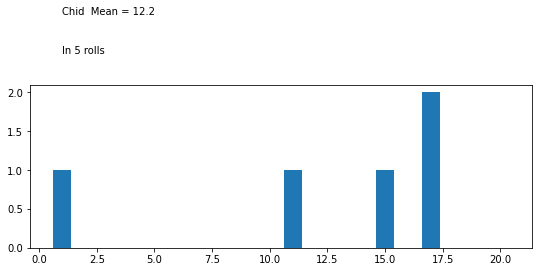

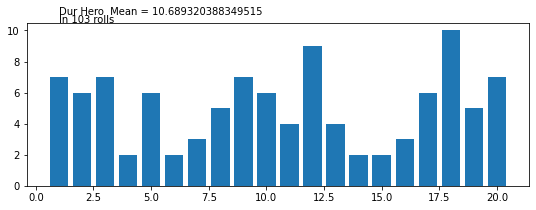

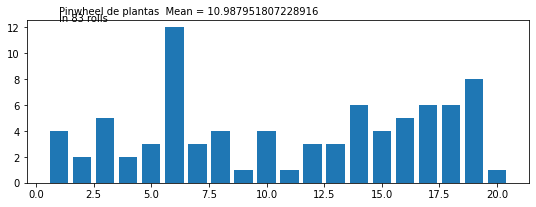

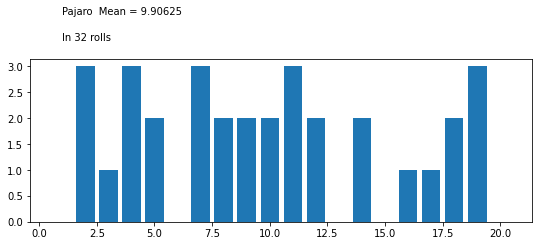

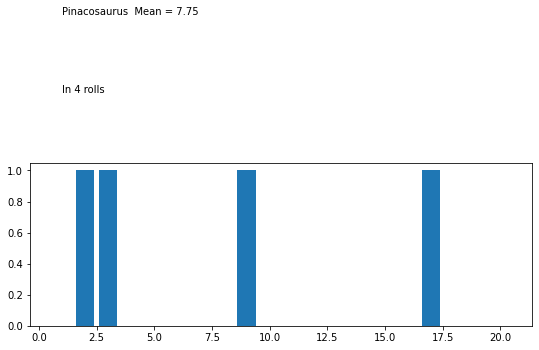

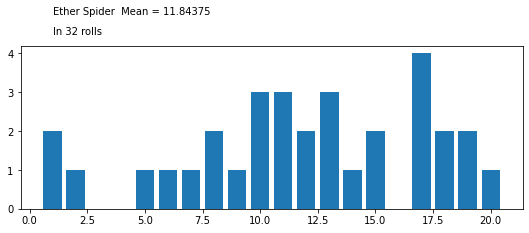

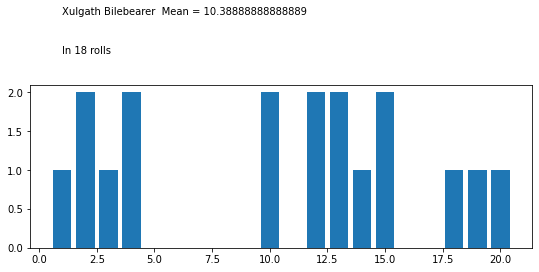

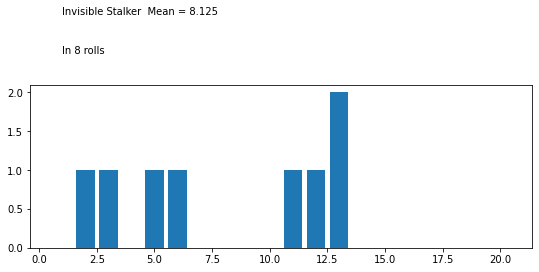

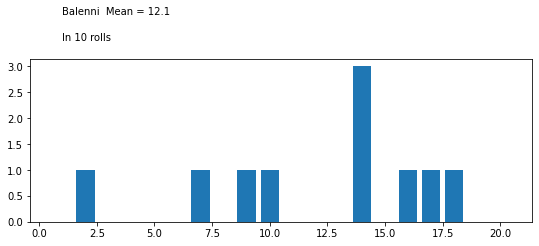

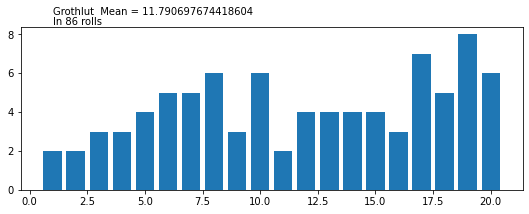

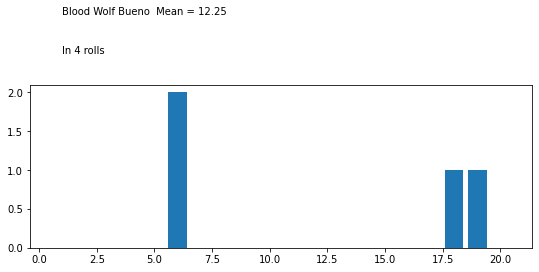

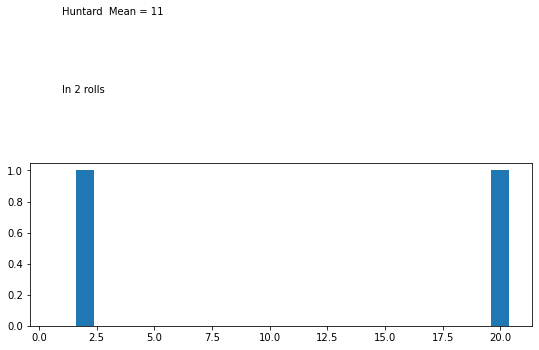

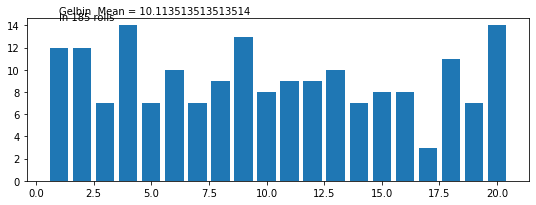

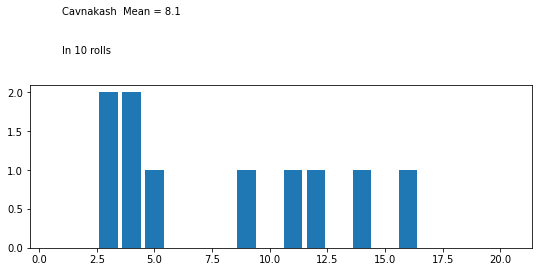

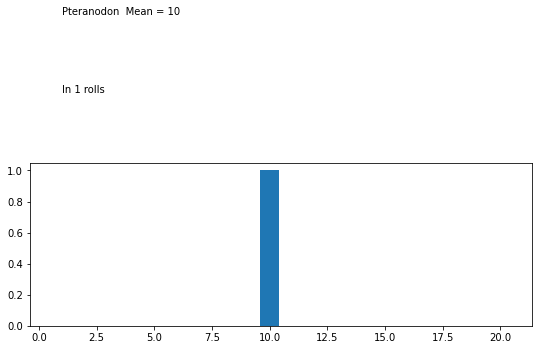

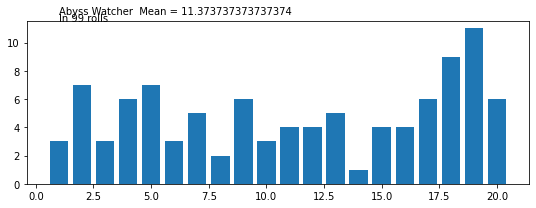

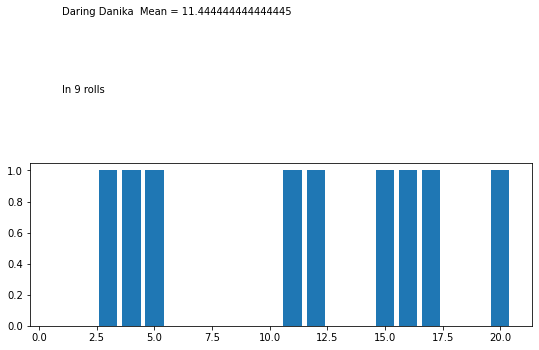

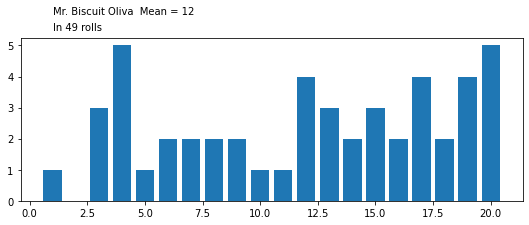

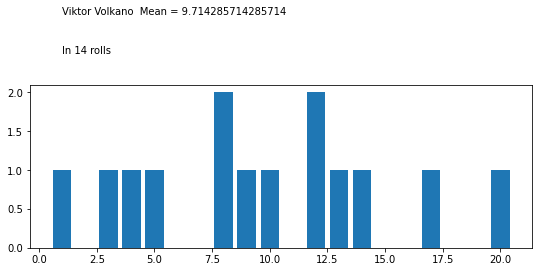

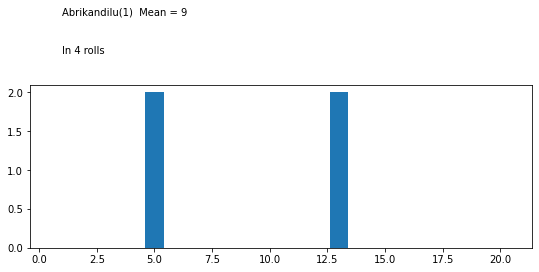

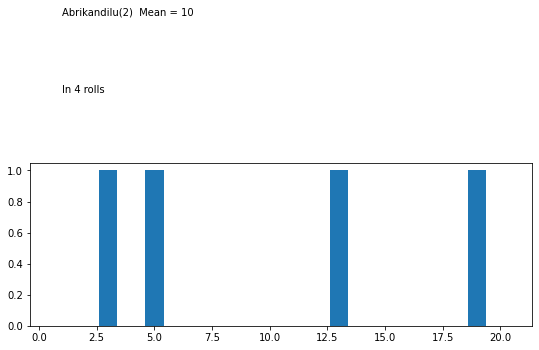

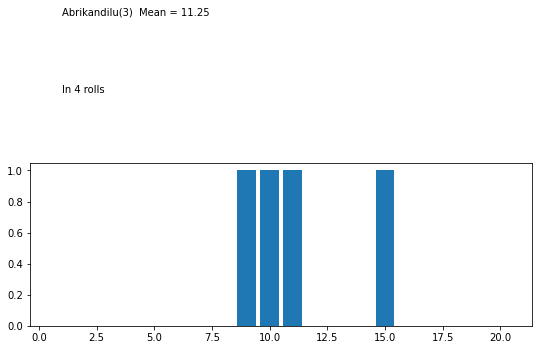

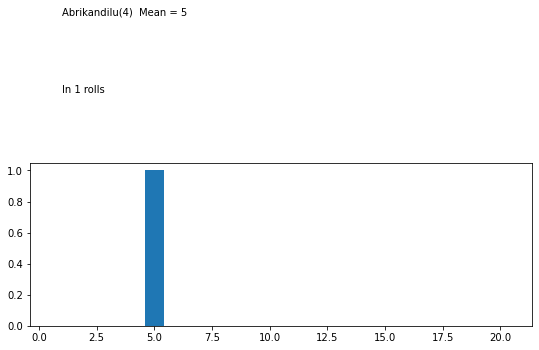

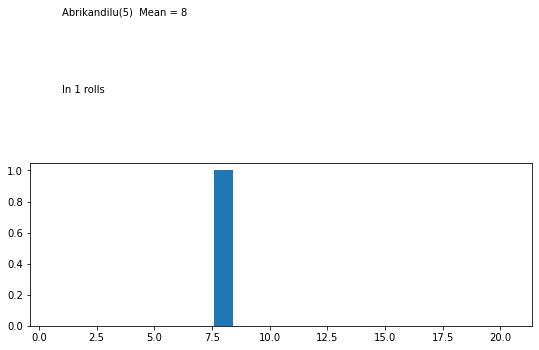

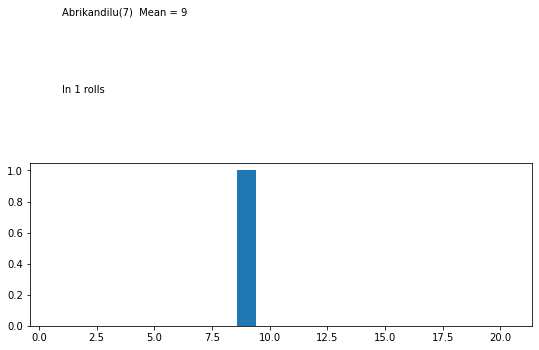

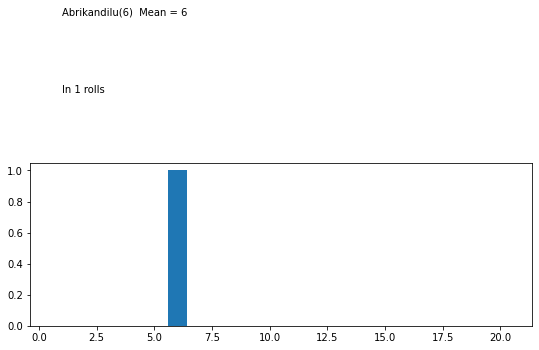

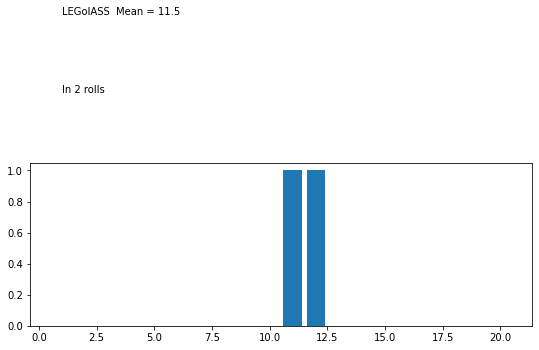

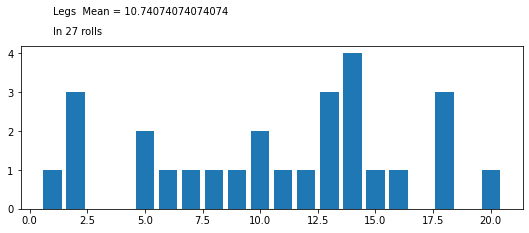

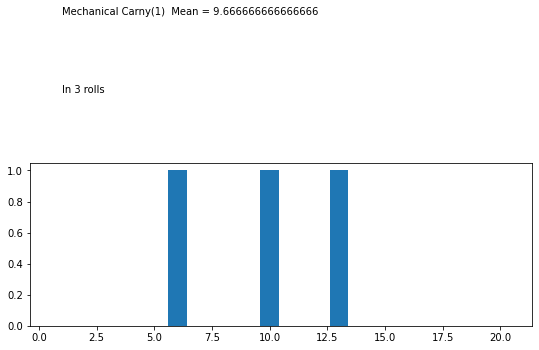

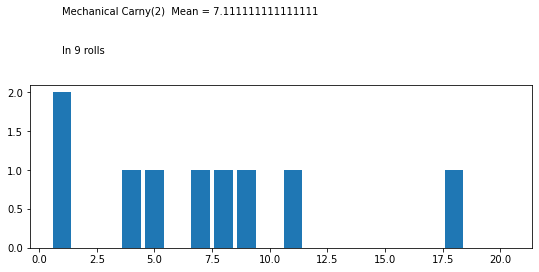

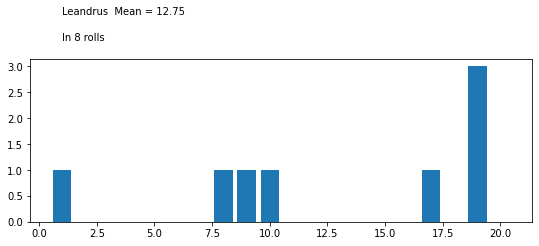

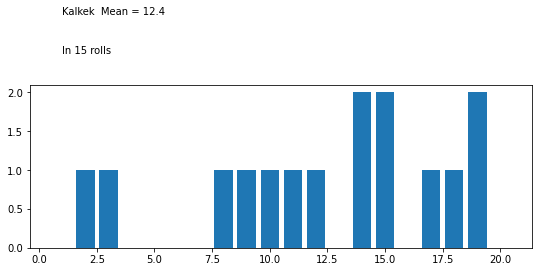

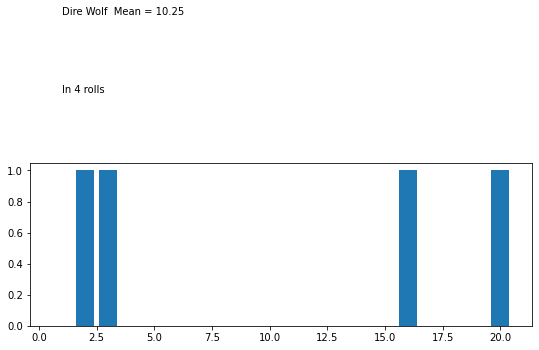

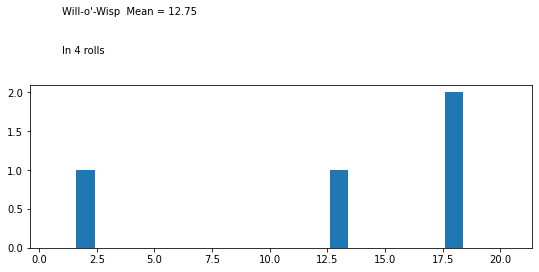

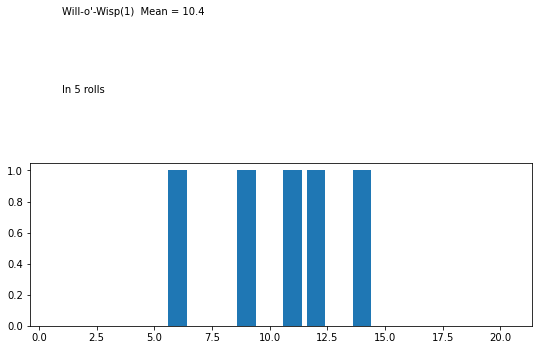

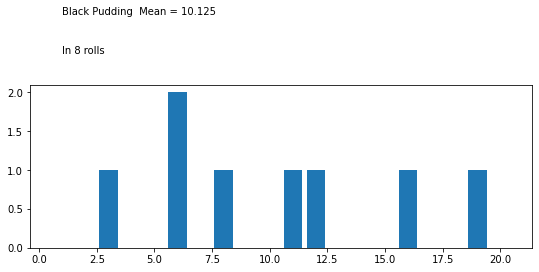

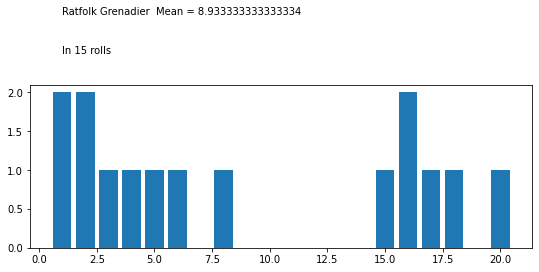

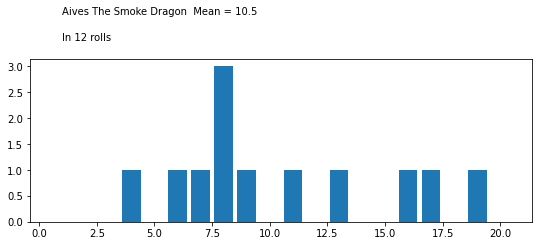

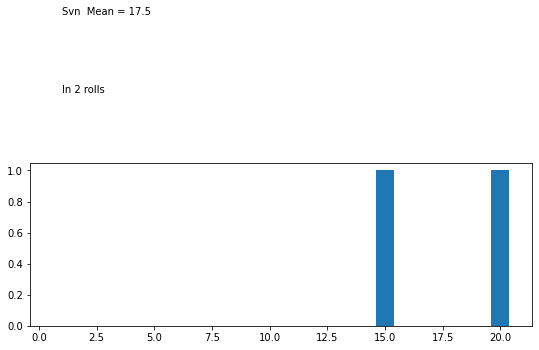

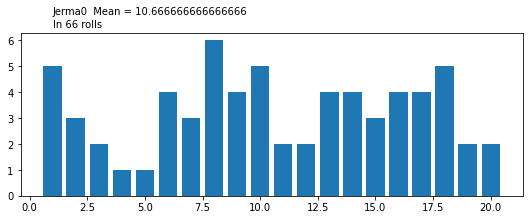

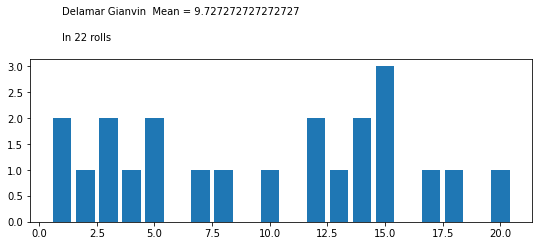

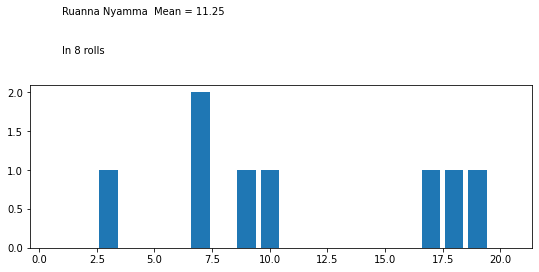

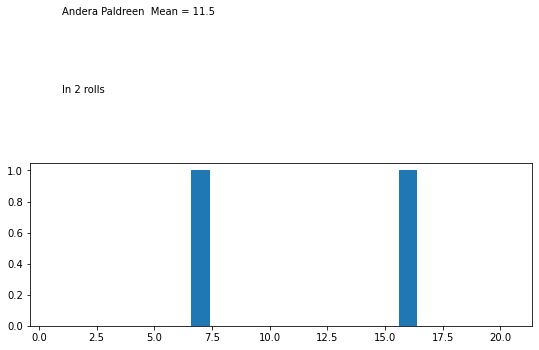

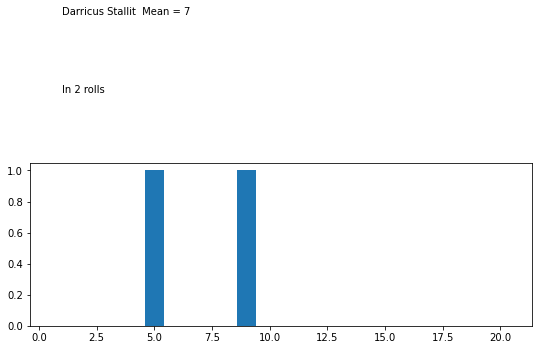

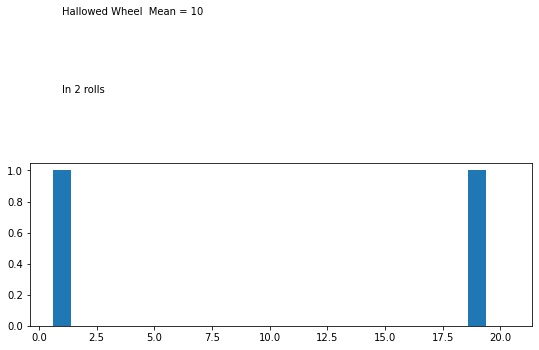

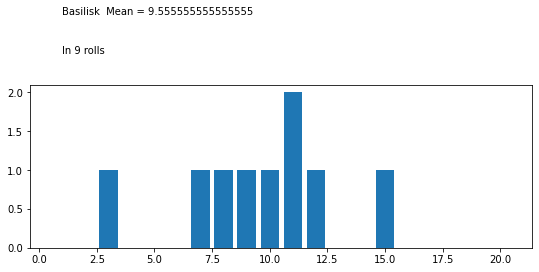

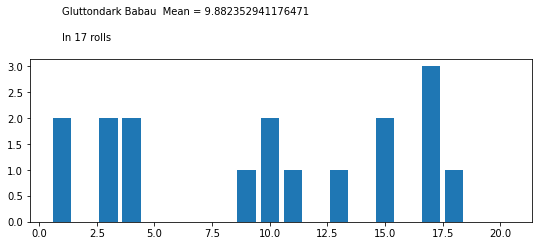

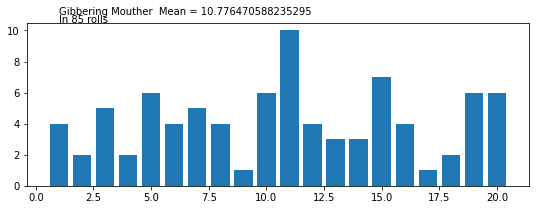

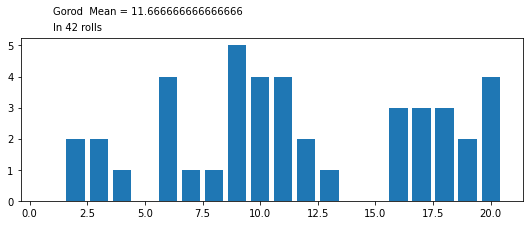

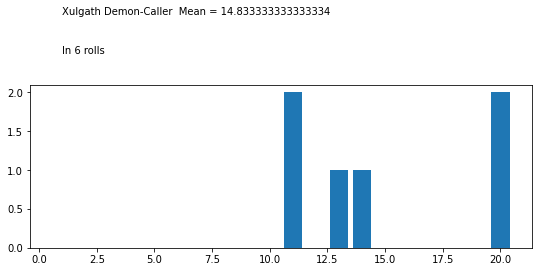

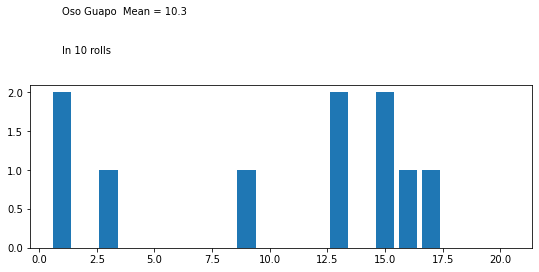

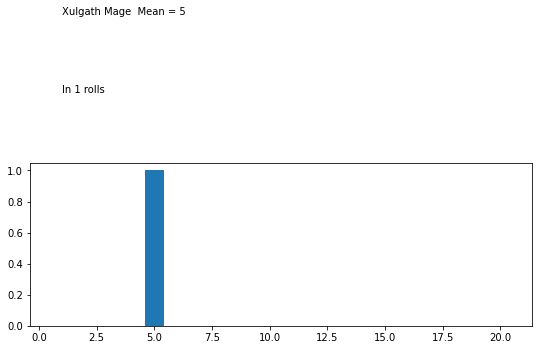

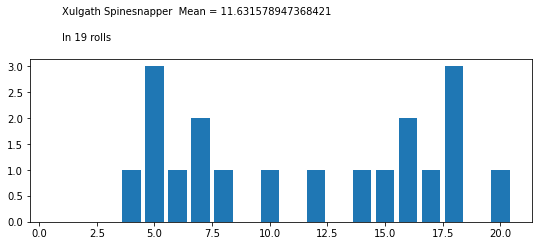

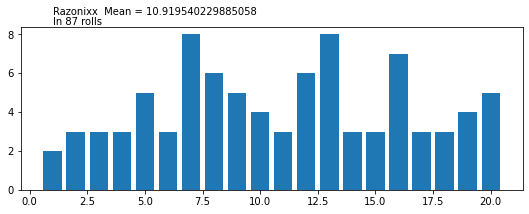

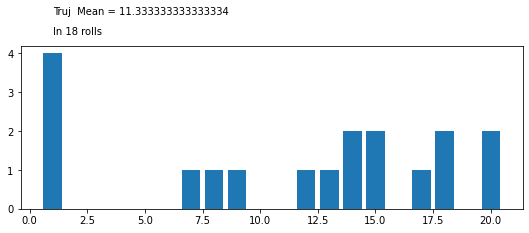

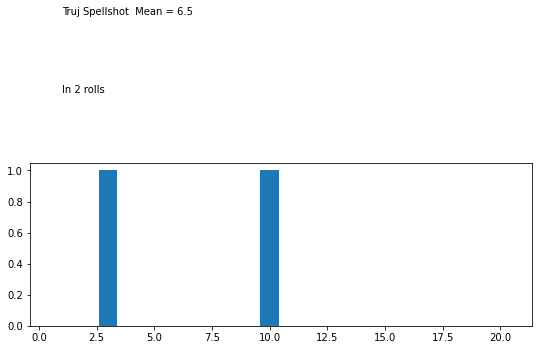

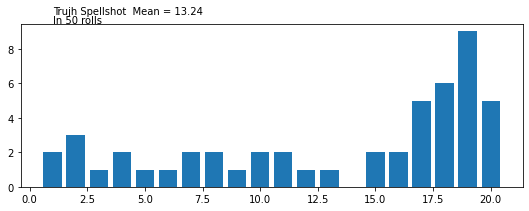

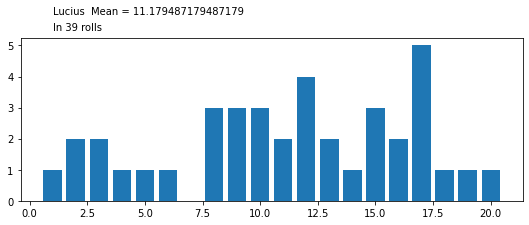

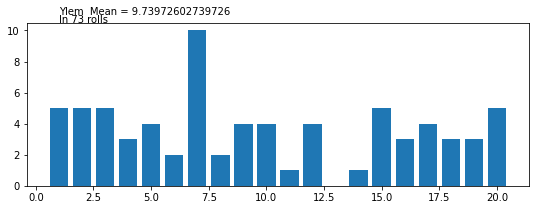

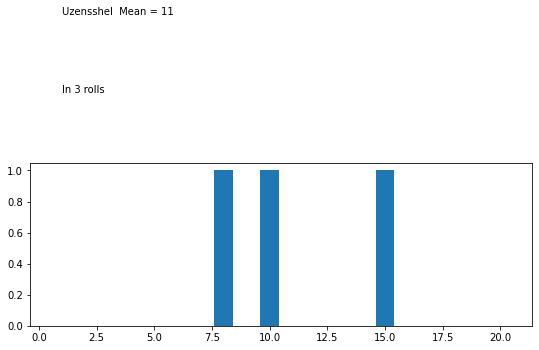

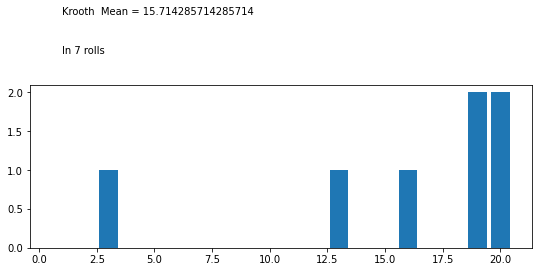

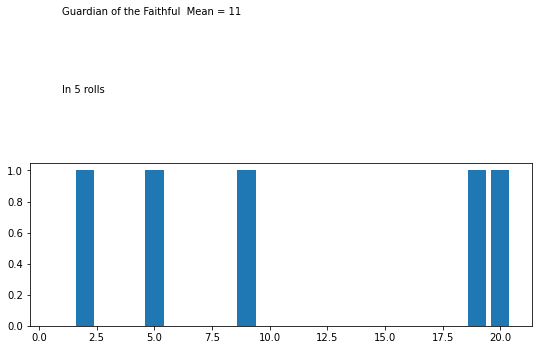

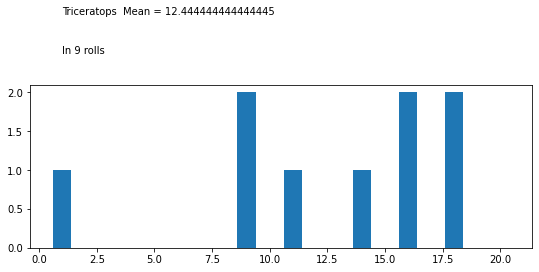

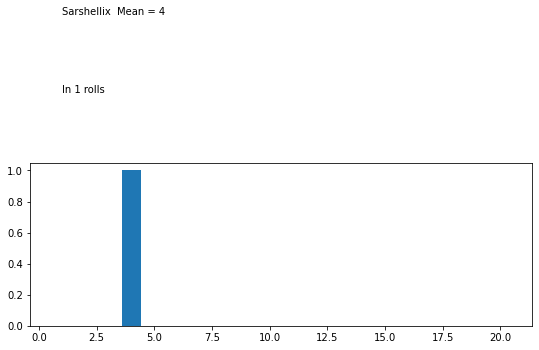

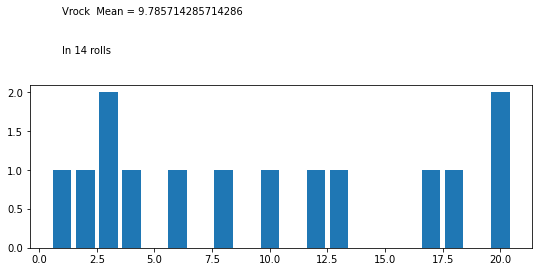

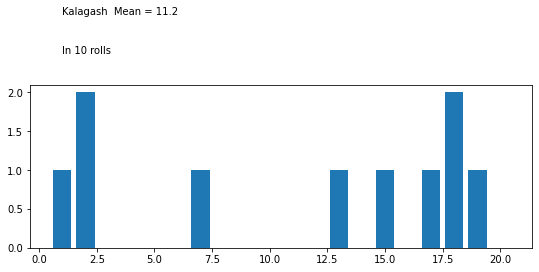

In [119]:

players = ["Lucius","Trujh Spellshot","Mr. Biscuit Oliva","Razonixx","Ylem"]
summary = []
for player in characters:
    rolls=[0] * 20
    historic = []
    x_dice = []
    for i in range(20):
        x_dice.append(i+1)
    length = len(players)
    fig, axs = plt.subplots(1, 1, figsize=(9, 3), sharey=True)
    for attempt in clean:
        if attempt[0] == player:
            roll = int(attempt[-1])
            rolls[roll-1]+=1
            historic.append(roll)
    summary.append([statistics.mean(historic),player,len(historic)])
    plt.bar(x_dice,rolls)
    plt.text(1,max(rolls)+1,player + "  Mean = " + str(statistics.mean(historic)))
    plt.text(1,max(rolls)+.5,"In " + str(len(historic)) +" rolls")
summary.sort()

In [121]:
summary.reverse()
summary

[[18, 'Shrigma Male', 1],
 [17.5, 'Svn', 2],
 [15.714285714285714, 'Krooth', 7],
 [14.833333333333334, 'Xulgath Demon-Caller', 6],
 [14, 'Ruffian3', 1],
 [13.333333333333334, 'Water Mephit', 3],
 [13.24, 'Trujh Spellshot', 50],
 [13.142857142857142, 'Grig', 7],
 [12.75, "Will-o'-Wisp", 4],
 [12.75, 'Leandrus', 8],
 [12.705882352941176, 'Viper', 17],
 [12.444444444444445, 'Triceratops', 9],
 [12.4, 'Kalkek', 15],
 [12.25, 'Blood Wolf Bueno', 4],
 [12.2, 'Chid', 5],
 [12.1, 'Balenni', 10],
 [12, 'Npc Actor', 3],
 [12, 'Mr. Biscuit Oliva', 49],
 [11.89655172413793, 'Gargoyle', 29],
 [11.84375, 'Ether Spider', 32],
 [11.842105263157896, 'Bardolf', 19],
 [11.790697674418604, 'Grothlut', 86],
 [11.69, 'Lizardo Lagartijo', 100],
 [11.666666666666666, 'Gorod', 42],
 [11.631578947368421, 'Xulgath Spinesnapper', 19],
 [11.5, 'LEGolASS', 2],
 [11.5, 'Gourd Leshy', 2],
 [11.5, 'Andera Paldreen', 2],
 [11.5, 'Air Mephit', 2],
 [11.444444444444445, 'Daring Danika', 9],
 [11.444444444444445, 'Blood w